In [1]:
import pandas as pd
import seaborn as sns
from haversine import haversine

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import sys
from datawand.parametrization import ParamHelper
ph = ParamHelper("../pipelines/EcmlTaxi.json",sys.argv)

Default parameters:
{u'data_folder': u'/home/fberes/DATA/taxi-challange/', u'gbt_use_exact_lat': False, u'lng_digits': 2, u'lat_digits': 3, u'is_test': False, u'part': u'_50000', u'gbt_use_exact_lng': False}
Custom parameters:
{}


# Haversine distance

**Conclusion:** I must use at least 3 digit in gps locations

### 2 digit precision : approx. 1 km

In [4]:
print haversine((-8.62, 41.141412),(-8.61, 41.141412))
print haversine((-8.618643, 41.14),(-8.618643, 41.15))

1.11194926645
1.09939277129


### 3 digit precision: approx 100 m

In [5]:
print haversine((-8.610, 41.141412),(-8.611, 41.141412))
print haversine((-8.618643, 41.150),(-8.618643, 41.151))

0.111194926645
0.109939277132


# Load Data

In [6]:
data_folder = ph.get("data_folder")
part = ph.get("part")
lat_digits = ph.get("lat_digits")
lng_digits = ph.get("lng_digits")

Using default parameter: data_folder=/home/fberes/DATA/taxi-challange/
Using default parameter: part=_50000
Using default parameter: lat_digits=3
Using default parameter: lng_digits=2


In [7]:
taxi_trips = pd.read_csv("%s/gen_train%s_lng%i_lat%i.csv" % (data_folder, part, lng_digits, lat_digits))

In [8]:
taxi_trips_test = pd.read_csv("%s/gen_test_lng%i_lat%i.csv" % (data_folder, lng_digits, lat_digits))

In [9]:
taxi_trips.head(1)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRIP_LAT,...,TRIP_LNG_MEAN_DIFF,TRIP_LAT_MEDIAN_DIFF,TRIP_LNG_MEDIAN_DIFF,DATE,TIME,DAY_OF_WEEK,TIME_OF_DAY,CALL_TYPE_onehot_dispatch,CALL_TYPE_onehot_driver,CALL_TYPE_onehot_other
0,1372636858620000589,other,NaN,NaN,20000589,1372636858,normal,False,"[(-8.62, 41.141), (-8.62, 41.141), (-8.62, 41....","[41.141, 41.143, 41.144, 41.144, 41.145, 41.14...",...,0.008095,0.01,0.01,2013-07-01,00:00:58,0,0,0.0,0.0,1.0


In [10]:
taxi_trips.columns

Index([u'TRIP_ID', u'CALL_TYPE', u'ORIGIN_CALL', u'ORIGIN_STAND', u'TAXI_ID',
       u'TIMESTAMP', u'DAY_TYPE', u'MISSING_DATA', u'POLYLINE', u'TRIP_LAT',
       u'TRIP_LNG', u'DESTINATION_LAT_FULL', u'DESTINATION_LNG_FULL',
       u'DESTINATION_LAT', u'DESTINATION_LNG', u'DEPARTURE_LAT_FULL',
       u'DEPARTURE_LNG_FULL', u'DEPARTURE_LAT', u'DEPARTURE_LNG', u'TRIP_SIZE',
       u'TRIP_LAT_UNIQUE', u'TRIP_LAT_UNIQUE_RATIO', u'TRIP_LNG_UNIQUE',
       u'TRIP_LNG_UNIQUE_RATIO', u'TRIP_LAT_MIN', u'TRIP_LAT_MAX',
       u'TRIP_LAT_MEAN', u'TRIP_LAT_MEDIAN', u'TRIP_LAT_STD', u'TRIP_LNG_MIN',
       u'TRIP_LNG_MAX', u'TRIP_LNG_MEAN', u'TRIP_LNG_MEDIAN', u'TRIP_LNG_STD',
       u'TRIP_LAT_MIN_DIFF', u'TRIP_LNG_MIN_DIFF', u'TRIP_LAT_MAX_DIFF',
       u'TRIP_LNG_MAX_DIFF', u'TRIP_LAT_MEAN_DIFF', u'TRIP_LNG_MEAN_DIFF',
       u'TRIP_LAT_MEDIAN_DIFF', u'TRIP_LNG_MEDIAN_DIFF', u'DATE', u'TIME',
       u'DAY_OF_WEEK', u'TIME_OF_DAY', u'CALL_TYPE_onehot_dispatch',
       u'CALL_TYPE_onehot_driver', 

# Time information

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aa17b2850>]], dtype=object)

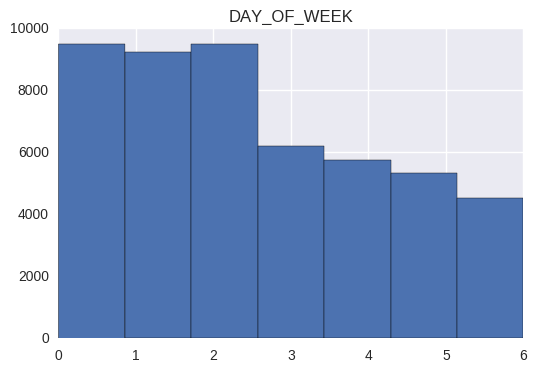

In [11]:
taxi_trips.hist("DAY_OF_WEEK",bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aa6529210>]], dtype=object)

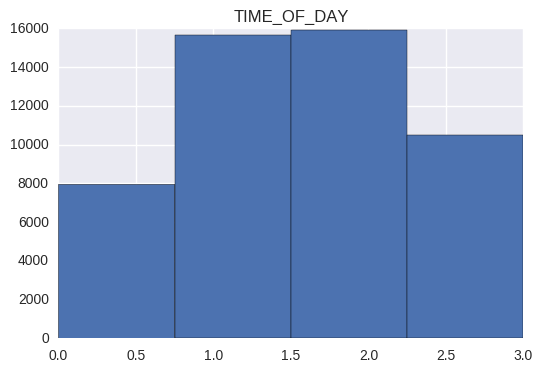

In [12]:
taxi_trips.hist("TIME_OF_DAY",bins=4)

from altair import *

Chart(taxi_trips).mark_point().encode(
    x='DAY_OF_WEEK',
    y='TIME_OF_DAY',
    size='count(TIME_OF_DAY)',
    color='count(TIME_OF_DAY)'
)

# Trip length

In [13]:
taxi_trips_test["TRIP_SIZE"].mean()

43.125

In [14]:
taxi_trips["TRIP_SIZE"].mean()

45.85654

In [15]:
taxi_trips_test["TRIP_LAT_UNIQUE"].mean()

11.890625

In [16]:
taxi_trips["TRIP_LAT_UNIQUE"].mean()

15.99086

In [17]:
taxi_trips_test["TRIP_LNG_UNIQUE"].mean()

3.29375

In [18]:
taxi_trips["TRIP_LNG_UNIQUE"].mean()

4.0955

# Location information: Porto, Portugal

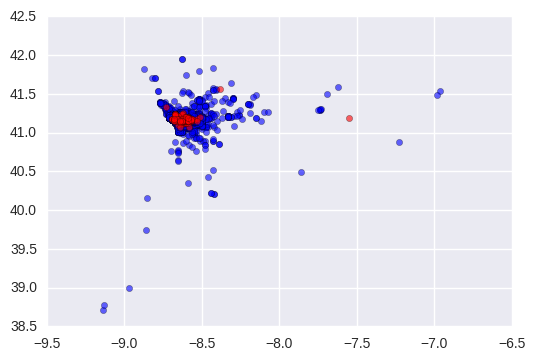

In [19]:
taxi_trips_head = taxi_trips#.head(10000)
plt.scatter(taxi_trips_head["DESTINATION_LNG"], taxi_trips_head["DESTINATION_LAT"],c="b",alpha=0.6)
plt.scatter(taxi_trips_test["DESTINATION_LNG"], taxi_trips_test["DESTINATION_LAT"],c="r",alpha=0.6)

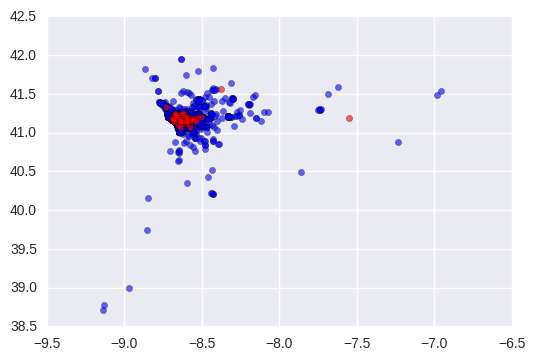

In [20]:
plt.scatter(taxi_trips_head["DESTINATION_LNG_FULL"], taxi_trips_head["DESTINATION_LAT_FULL"],c="b",alpha=0.6)
plt.scatter(taxi_trips_test["DESTINATION_LNG_FULL"], taxi_trips_test["DESTINATION_LAT_FULL"],c="r",alpha=0.6)

In [21]:
taxi_trips["MISSING_DATA"].value_counts()

False    50000
Name: MISSING_DATA, dtype: int64

taxi_trips["POLYLINE"] = taxi_trips["POLYLINE"].apply(lambda x: eval(x))

taxi_trips["POLYLINE_SIZE"] = taxi_trips["POLYLINE"].apply(lambda x: len(x))

Chart(taxi_trips).mark_point().encode(
    x='DAY_OF_WEEK',
    y='TIME_OF_DAY',
    size='mean(POLYLINE_SIZE)',
    color='mean(POLYLINE_SIZE)'
)

Chart(taxi_trips).mark_point().encode(
    x='DAY_OF_WEEK',
    y='TIME_OF_DAY',
    size='mean(POLYLINE_SIZE)',
    color='mean(POLYLINE_SIZE)'
)

Chart(taxi_trips).mark_point().encode(
    x='DAY_TYPE',
    y='TIME_OF_DAY',
    size='mean(POLYLINE_SIZE)',
    color='mean(POLYLINE_SIZE)'
)

#### Unique locations

gps_locs = {}
for i in xrange(len(taxi_trips)):
    for loc in set(taxi_trips.ix[i]["POLYLINE"]):
        if not loc in gps_locs:
            gps_locs[loc] = 0
        gps_locs[loc] += 1

len(gps_locs)